## Линейная регрессия

Задача регрессии похожа на задачу классификации, только вместо категории мы предсказываем число. Например стоимость автомобиля по его пробегу, количество пробок по времени суток и т.д.

Линейная регрессия ищет линейную зависимость между объектом и ответом. 

### Пример
* $\mathbb{X} = \mathbb{R}$
* $\mathbb{Y} = \mathbb{R}$
* Найти такие $w, b \in \mathbb{R}$, что $w\cdot x_i + b = y_i$ для всех $i$. 

Иногда такую задачу называют Simple Linear Regression из-за её одномерности.

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter("ignore")
from IPython.display import Image
%matplotlib inline

sns.set(style="darkgrid")

SEED=31415
np.random.seed(31415)

Text(0, 0.5, 'y')

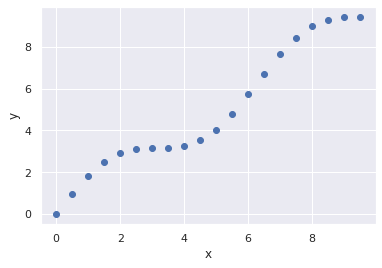

In [2]:
x = np.arange(0, 10, 0.5)[:,np.newaxis]
y = np.sin(x) + x

plt.scatter(x, y)
plt.xlabel("x")
plt.ylabel("y")

Наша задача найти $a\cdot x_i + b = y_i$ заметим, что это то же самое что провести прямую, проходящую максимально близко с этими точками. Проведём какую-нибудь прямую.

Text(0, 0.5, 'y')

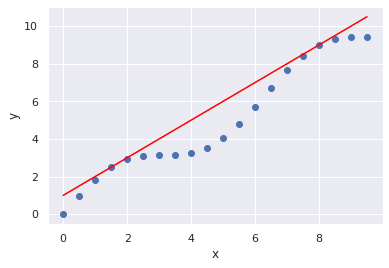

In [3]:
w, b = 1, 1
plt.scatter(x, y)
plt.plot(x, w * x + b, color='red')
plt.xlabel("x")
plt.ylabel("y")

Выглядит так, как будто это не самая оптимальная прямая.

![](https://miro.medium.com/max/683/1*h6PuI6-PdPE8d4dTnhcg3w.png)

А как вообще определять насколько прямая оптимальна? Что будет функцией качества? Существует несколько функций качества регрессии. Давайте рассмотрим их:

* mean absolute error: $MAE(X) = \frac{1}{n}\sum_{i=1}^{n}|a(x_i) - y_i|$
* mean squared error: $MSE(X) = \frac{1}{n}\sum_{i=1}^{n}(a(x_i) - y_i)^2$

Давайте изучим их свойства. 
1. Интерпретируемость. Допустим, вы хотите предсказать стоимость автомобиля. Что будет означать MSE в тако случае? А MAE?
1. Оценка качества модели. Такие функции ошибок позваляют легко сравнивать модели между собой, но что они гооврят о том насколько хорошо работает сама модель? Будет ли хорошим результат MSE=10 или MAE=10 на выборке, где все $y_i$ лежат в отрезке $[0,1]$? А в отрезке $[10^5,10^6]$.
1. Дифференцируемость (а это тут при чём вообще?!). 
1. Устойчивость к выбросам. Какая из функций наиболее устойчива к выбросам? (изучим этот вопрос далее)

Рассмотрим вопрос устойчивости к выбросам чуть подробнее. Реализуйте функции MSE и MAE изменив не более одной строчки кода.

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
def MSE(predicted, y):
    '''
    Compute MSE (scalar) as in the formula above
    :param predicted: np.array of predicted values, [n]
    :param y: np.array of targets, [n]
    '''
    mae = <YOUR CODE>
    return mae  # scalar

def MAE(predicted, y):
    '''
    Compute MAE (scalar) as in the formula above
    :param predicted: np.array of predicted values, [n]
    :param y: np.array of targets, [n]
    '''
    mse = <YOUR CODE>
    return mse  # scalar

In [ ]:
assert np.allclose(MSE(w * x + b, y), 1.084, rtol=0.1, atol=0.1), "We're sorry for your MSE"
assert np.allclose(MAE(w * x + b, y), 0.806, rtol=0.1, atol=0.1), "We're sorry for your MAE"

Добавим в наш датасет выброс:

In [ ]:
y[5] = 10
y[7] = -1

In [ ]:
print("MSE =", MSE(w * x + b, y))
print("MAE =", MAE(w * x + b, y))

MSE = 4.610099396256734
MAE = 1.318724223944781


На какую из метрик выброс повлиял больше? Почему?

## Обучение линейной регрессии (одномерный случай)
Чаще всего для обучения используется функция MSE. В этом случае получаем следующую задачу оптимизации.

$$\frac1n\sum\limits_{i=1}^n(w \cdot x_i + b - y_i)^2\to\min_{w,b}$$

### Метод наименьших квадратов
Но подождите? А нельзя ли получить точное решение этой задачи?

Возьмём производную функции, которую оптимизируем, по $b$:
$$\frac1n\sum\limits_{i=1}^n(w \cdot x_i + b - y_i)$$
Приравняем к нулю:
$$\frac1n\sum\limits_{i=1}^n(w \cdot x_i + b - y_i)=0$$
$$b = \overline{y}-w\cdot\overline{x}$$

Аналогичными рассуждениями вычислите формулу для $b$. И допишите код, который вычисляет значения $w, b$.

In [ ]:
def lin_reg_weight(x, y):
    w = <YOUR CODE>
    return w

def lin_reg_bias(x, y):
    return y.mean() - lin_reg_weight(x, y) * x.mean()

In [ ]:
y = np.sin(x) + x
w = lin_reg_weight(x, y)
b = lin_reg_bias(x, y)

Text(0, 0.5, 'y')

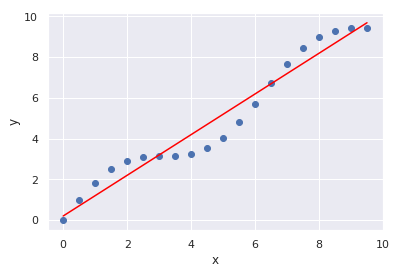

In [ ]:
plt.scatter(x, y)
plt.plot(x, w * x + b, color='red')
plt.xlabel("x")
plt.ylabel("y")

In [ ]:
assert np.allclose(MSE(w * x + b, y), 0.434, rtol=0.1, atol=0.1), "something's wrong with your least squares"

А где же, собственно, машинное обучение?

## Обучение линейной регрессии (многомерный случай)
В общем случае (когда размерность пространства объектов не обязательно один) формула для линейной регрессии выглядит как суммирование признаков с некоторыми коэффициентами:
$$a(x) = b + \sum\limits_{i=1}^n w_i\cdot x_i$$
* Параметры $w$ называются веса (weights) или коэффициенты.
* Параметр $b$ называется сдвигом (bias) или свободным коэффициентом.
Заметим, что сумма в формуле это скалярное произведение двух векторов: $w$ и $x$. Перепишем формулу.
$$a(x) = b + \langle w, x\rangle$$
Как можно упростить запись, чтобы избавиться от слагаемого $b$?

Итак, будем решать задачу оптимизации в общем виде. 
$$\frac1n\sum\limits_{i=1}^n(\langle w, x_i\rangle - y_i)^2\to\min\limits_w$$

Пусть у нас есть $m$ объектов, у каждого объекта $n$ признаков. Тогда можно записать задачу в матричном виде:
$$\frac1n||X\cdot w-y||^2\to\min\limits_w$$
* $X$ — объектов матрица $[m, n]$
* $w$ — вектор весов $[n, 1]$
* $y$ — вектор ответов $[m, 1]$
* $||V||^2$ — сумма квадратов всех элементов вектора

Для этой задачи так же можно получить точное решение, но оно имеет несколько проблем:
* Сложность алгоритма
* Решение не всегда можетсуществовать
* Если поменять функцию ошибок, аналитическое решение может даже не найтись

### Градиентный спуск
Напомним, что градиент функции это вектор всех её частных производных.

Для функции $$f(x_1, x_2, \ldots, x_n)$$ градиентом будет $$\nabla f(x_1, x_2, \ldots, x_n)=\left(\frac{\partial f}{\partial x_1}, \frac{\partial f}{\partial x_2}, \ldots, \frac{\partial f}{\partial x_n}\right)$$
Также, градиент указывает на направление роста функции, а антиградиент — на направление убывания. Этими свойствами мы и будем пользоваться.

Идея градиентного спуска довольно проста:
1. Стартуем в какой-то точке $n$-мерного пространства.
1. Считаем функцию ошибок.
1. Считаем градиенты от функции ошибок по каждому весу.
1. Сдвигаем каждый из весов на маленький шаг в сторону антиградиента.
1. Продолжаем, пока градиент не станет близок к нулю.

Запишем более формально. 

Пусть 

$lr$ (от learning rate) — размер шага, на котором мы сдвигаем градиент на каждой итерации.

$w$ — вектор весов, изначальнонулевой, либо из какого-то распределения.

$L(w) = \frac1n\sum\limits_{i=1}^n(\langle w, x_i\rangle - y_i)^2$

Тогда каждый шаг выглядит так: $$w_{new}:=w-lr\cdot\nabla L(w)$$

Теперь запишем градиенты для линейной регрессии. Давайте найдём производную для одного веса $w_j$:

$$L(w)=\frac1n\sum\limits_{i=1}^n(\langle w, x_i\rangle - y_i)^2$$
$$\frac{\partial L(w)}{\partial w_j}=\frac2n\sum\limits_{i=1}^nx_i^j\cdot(\langle w, x_i\rangle - y_i)$$
В матричном виде это будет выглядеть так:
$$\nabla L(w)=\frac2nX^T\cdot(X\cdot w-y)$$

**Важное замечание:** обратите внимание, что когда мы считаем градиенты, мы умножаем исходные данные. Если их не отнормировать перед этим, коэффициенты могут быстро стать очень большими.

Теперь мы можем написать свою реализацию линейной регресси. **homework**

In [ ]:
Image()

In [ ]:
from sklearn.base import BaseEstimator, RegressorMixin

class MyLinearRegression(BaseEstimator, RegressorMixin):
    def __init__(self, features_size, gradient_descending, max_iter=1000, l=0, lr=0.001):
        self.lr = lr
        self.l = l
        self.max_iter = max_iter
        self.w = np.random.normal(size=(features_size + 1, 1))
        self.gradient_descending = gradient_descending
        
    def fit(self, X, y):
        """ This should fit classifier. All the "work" should be done here 
            Recompute weights on each step
        """
        X = np.concatenate([X, np.ones((X.shape[0], 1))], axis=1)
        for step in range(self.max_iter):
            g = self.gradient_descending(self.w, X, y, self.l)
            if np.isnan(g[:,0]).any():  # check if gradients is nan something went wrong
                raise RuntimeError("Your gradient is nan")
            prev_w = np.copy(self.w)
            
            # пересчитайте градиенты
            self.w = <YOUR CODE>
            if ((prev_w - self.w) ** 2).sum() < 1e-10:
                break
        return self
        
    def predict(self, X, y=None):
        """ Predict target class for X """
        # единичную фичу для сдвига
        X = np.concatenate([X, np.ones((X.shape[0], 1))], axis=1)
        
        # посчитайте результат
        return <YOUR CODE>

In [ ]:
def gradient_descending(w, X, y, l):
    # посчитайте градиент функции ошибок по весам. Переменная l=0, не используйте её.
    g = <YOUR CODE>
    return g

Добавим константный признак для всех объектов х. Он будет характеризовать сдвиг.

In [ ]:
from sklearn.preprocessing import scale
x = np.arange(0, 10, 0.5).reshape(20, 1)
y = np.sin(x) + x
y = y.reshape(20, 1)

x = scale(x, axis=0, with_mean=True, with_std=True)  # нормализуем данные так, чтобы среднее было 0, дисперсия 1
y = scale(y, axis=0, with_mean=True, with_std=True)

In [ ]:
r = MyLinearRegression(1, gradient_descending, lr=1e-2).fit(x, y)

Text(0, 0.5, 'y')

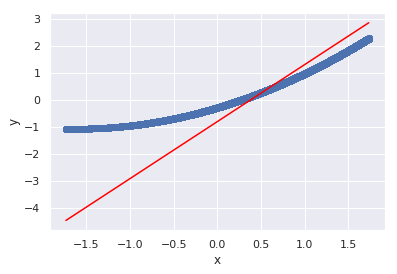

In [ ]:
plt.scatter(x, y)
plt.plot(x, r.predict(x), color='red')
plt.xlabel("x")
plt.ylabel("y")

In [ ]:
assert np.allclose(MSE(r.predict(x), y), 0.05, rtol=0.1, atol=0.1), "something's wrong with your linear regression"

#### Fine, let's try more data!

In [ ]:
N = 10000
x = np.arange(0, N, 0.5).reshape(2 * N, 1)
y = np.sqrt(x[:,0]) + 2 * (x[:,0] - 100) * (x[:,0] - 500)
y = y.reshape(2 * N, 1)
x = scale(x, axis=0, with_mean=True, with_std=True)
y = scale(y, axis=0, with_mean=True, with_std=True)

In [ ]:
r = MyLinearRegression(1, gradient_descending, lr=1e-1).fit(x, y)

В чём же дело? Проблема в том, что веса быстро стали слишком большими. А, как известно, $\infty-\infty=\mathrm{nan}$.

Давайте, также, будем штрафовать модель за то что веса стали слишком большие.

Теперь функция ошибок будет не $\frac1n||X\cdot w-y||^2$, а $$\frac1n||X\cdot w-y||^2+\frac\lambda2\cdot ||w||^2$$
$\lambda$ называют коэффициент регуляризации. И действительно, если формула будет такая, то как только веса станут слишком большими, модели придётся их уменьшить, ведь это уменьшит функцию ошибок. Такая регуляризация называется $L_2$-regularization. **homework**

In [ ]:
def gradient_descending_with_l2(w, X, y, l):
    # посчитайте градиент функции ошибок по весам. Используйте регуляризацию. 
    # Коэффициент регуляризации l
    g = <YOUR CODE>
    return g

In [ ]:
r = MyLinearRegression(1, gradient_descending_with_l2, l=100, lr=1e-5).fit(x, y)

Text(0, 0.5, 'y')

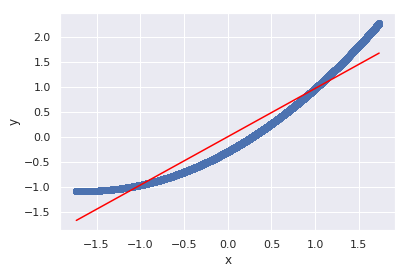

In [ ]:
plt.scatter(x[:,0], y)
plt.plot(x[:,0], r.predict(x), color='red')
plt.xlabel("x")
plt.ylabel("y")

In [ ]:
print("Your MSE is: ", MSE(r.predict(x), y))

Your MSE is:  0.07016259403702683


Если данных слишком много, то посчитать градиент по всем объектам не получается. Для этого есть стохаистический градиентный спуск. В нём случайно выбирается один объект и градиенты считаются только для него. Реализуйте это. **homework**

In [ ]:
def stokhaistik_gradient_descending_with_l2(w, X, y, l):
    # посчитайте градиент функции ошибок для случайного объекта по весам. Используйте регуляризацию. 
    # Коэффициент регуляризации l=0
    g = <YOUR CODE>
    return g

In [ ]:
r = MyLinearRegression(1, stokhaistik_gradient_descending_with_l2, l=0.1, lr=1e-3).fit(x, y)

Text(0, 0.5, 'y')

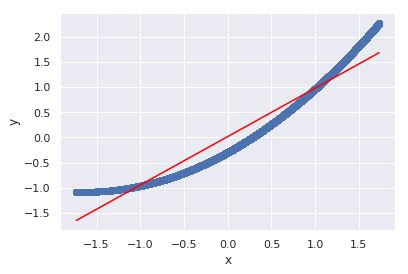

In [ ]:
plt.scatter(x[:,0], y)
plt.plot(x[:,0], r.predict(x), color='red')
plt.xlabel("x")
plt.ylabel("y")

In [ ]:
print("Your MSE is: ", MSE(r.predict(x), y))

Your MSE is:  0.07040546088250094


### Полиномиальные фичи.
К сожалению, наш мир нелинейный, поэтому чтобы линейная регрессия в чистом виде часто работает не очень хорошо. Однако, можно добавить новые фичи, чтобы исправить это. Рассмотрим пример.

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
x = np.linspace(0, 1, 100)
y = np.cos(1.5 * np.pi * x)

x_train = np.random.uniform(0, 1, size=30)
y_train = np.cos(1.5 * np.pi * x_train) + np.random.normal(scale=0.1, size=x_train.shape)

Обучим линейную регрессию со стандартными фичами, со всеми степенями до 4, со всеми степенями до 20.

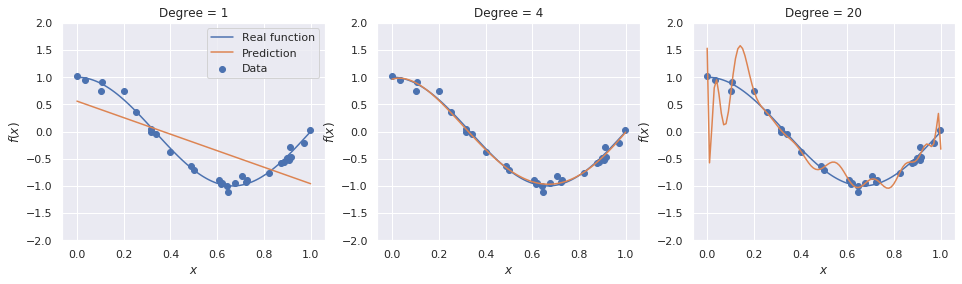

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
fig, axs = plt.subplots(figsize=(16, 4), ncols=3)
for i, degree in enumerate([1, 4, 20]):
    X_train = PolynomialFeatures(degree).fit_transform(x_train[:, None])
    X = PolynomialFeatures(degree).fit_transform(x[:, None])
    regr = LinearRegression().fit(X_train, y_train)
    y_pred = regr.predict(X)
    axs[i].plot(x, y, label="Real function")
    axs[i].scatter(x_train, y_train, label="Data")
    axs[i].plot(x, y_pred, label="Prediction")
    if i == 0:
        axs[i].legend()
    axs[i].set_title("Degree = %d" % degree)
    axs[i].set_xlabel("$x$")
    axs[i].set_ylabel("$f(x)$")
    axs[i].set_ylim(-2, 2)

Почему первая модель не доучилась, а последняя переобучилась?

--

Оказывается, что линейная регрессия — это очень мощный инструмент, если мы можем подбирать коэффициенты степенного ряда. Таким образом мы можем приближать любую функцию, не зная её вид, а подбирая коэффициенты в ряде Тейлора.

## Линейная классификация

Давайте приступим к рассмотрению задачи классификации. Начнём с того, что вспомним её постановку.

Пусть задана обучающая выборка $X = \left\{ \left( x_i, y_i \right) \right\}_{i=1}^l, x_i \in \mathbb{X}, y_i \in \mathbb{Y},$ — 
* $l$ пар объект-ответ, где
* $\mathbb{X}$ — пространство объектов,
* $\mathbb{Y}$ — пространство ответов.

Задача классификации отличается о задачи восстановления регрессии тем, что в данном случае пространство ответов конечно:



В случае классификации формула для ответа на объекте $x$ видоизменяется по сравнению с линейной регрессией (при этом мы предполагаем, что нулевой признак в выборке — константный):
$$a(x) = sign(\langle w, x\rangle)$$

Множество точек $\langle w, x\rangle = 0$ является гиперплоскостью и делит пространство на 2 части по разные стороны от этой самой гиперплоскости. При этом объекты, расположенные по разные стороны от неё, полученный классификатор относит к различным классам в зависимости от знака скалярного произведения.

![](https://habrastorage.org/getpro/habr/post_images/555/369/344/5553693449d97a6ccb730f4760a2eacd.png)


Но получившийся функционал $a(x)$ не получается оптимизировать градиентными методами. Тем не менее, у нас есть функция, которая переводит объект в $[-\infty, +\infty]$. Давайте научимся получать из этого вероятность $P\in[0,1]$. Это число будет означать, с какой вероятностью объект принадлежит к классу $1$? 

В качестве такой функции будем использовать [сигмоиду](https://ru.wikipedia.org/wiki/%D0%A1%D0%B8%D0%B3%D0%BC%D0%BE%D0%B8%D0%B4%D0%B0) (иногда называется логистическая функция): $$\sigma(x)=\frac{1}{1-e^{x}}$$
![](https://upload.wikimedia.org/wikipedia/commons/a/ac/Logistic-curve.png)

Таким образом, у нас получилась следующая функция:

$$\tilde L(x) = \frac1{1-e^{\langle w, x\rangle}}$$

А в качестве функции потерь возьмём логарифм функции правдоподобия, для двух классов она будет выглядеть так:
$$ \dfrac{1}{N}\sum_{i=1}^N \log(1 + \exp(-\langle w, x_i \rangle y_i))  \to \min_w$$

Точно так же, в логистической регрессии нужно использовать регуляризацию. Задачу обучения регуляризованной логистической регрессии можно записать следующим образом:
$$ \dfrac{1}{N}\sum_{i=1}^N \log(1 + \exp(-\langle w, x_i \rangle y_i)) + \dfrac{\lambda}{2}\lVert w \rVert^2  \to \min_w$$

### Обучение Логистической Регрессии




In [ ]:
from sklearn.datasets import make_classification, make_blobs
from sklearn.linear_model import LogisticRegression

In [ ]:
X, y = make_blobs(n_samples=300, centers=2)
y = 2 * y - 1

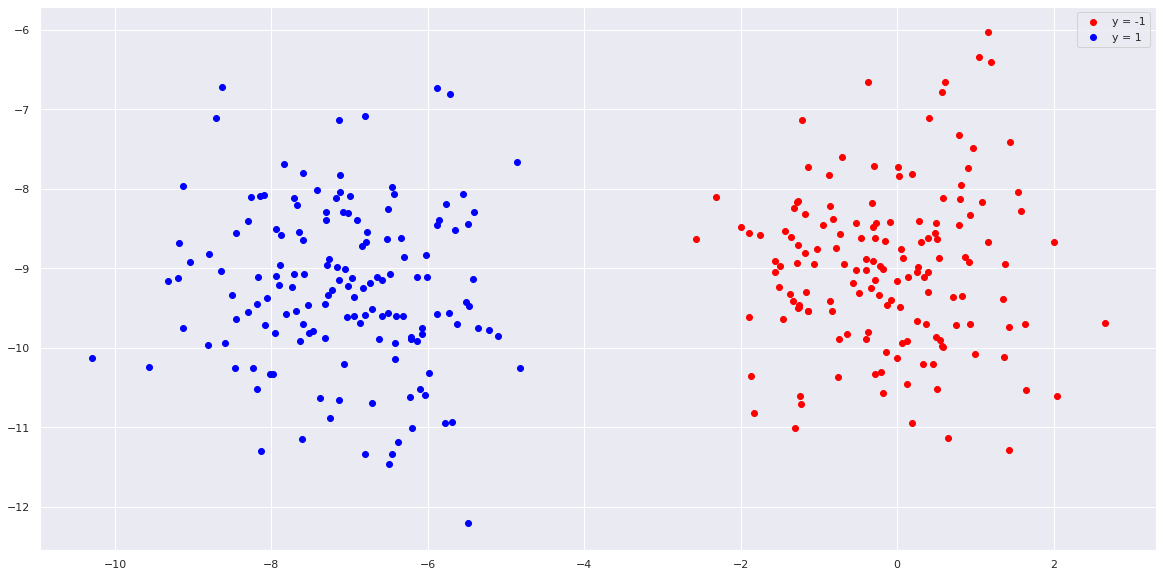

In [ ]:
ind = y == -1
plt.figure(figsize=(20,10))
plt.scatter(X[ind,0], X[ind,1], c='red')
plt.scatter(X[~ind,0], X[~ind,1], c='blue')
plt.legend(['y = -1', 'y = 1'])
plt.show()

In [ ]:
lr = LogisticRegression().fit(X, y)
w_1 = lr.coef_[0][0]
w_2 = lr.coef_[0][1]
w_0 = lr.intercept_[0]

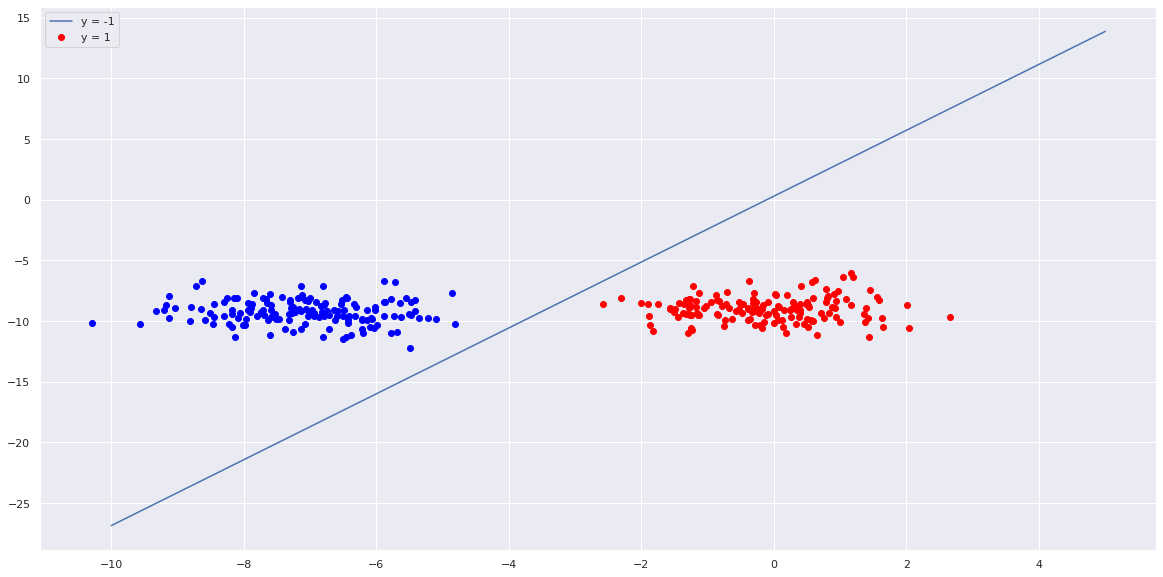

In [ ]:
ind = y == -1
plt.figure(figsize=(20,10))
plt.scatter(X[ind,0], X[ind,1], c='red')
plt.scatter(X[~ind,0], X[~ind,1], c='blue')
x_arr = np.linspace(-10, 5, 1000)
plt.plot(x_arr, -(w_0 + w_1 * x_arr) / w_2)
plt.legend(['y = -1', 'y = 1'])
plt.show()

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter("ignore")
from IPython.display import Image
%matplotlib inline

# Семинар №6. Линейные модели и Градиентный спуск.

# Постановка задачи

Пререквизиты:
* $n$ - количество объектов в выборке
* $m$ - количество признаков у объекта
* все вектора - **столбцы**
* $I_{a\times b}$ - единичная матрица
* $O_{a\times b}$ - нулевая матрица
* $E_{a\times b}$ - матрица из всех единиц

Давайте вспомним, что такое задача линейной регрессии в рамках машинного обучения. 

У нас есть обучающая выборка $(X, y)$, c $n$ объектами и $m$ признаками. (Значит размер $X$ - $n\times m$)

Алгоритм решения выбирается из простнанства линейных функций:

$a(x^1) = w_0 + w_1x_1^1 + \ldots + w_mx_m^1$


## Точное решение 

Нам нужно найти такое $a(\cdot)$, чтобы решилась система уравнений
$$\begin{cases}
a(x^1) = w_0 + w_1x_1^1 + \ldots + w_mx_m^1 = y^1\\
\ldots \\
a(x^i) = w_0 + w_1x_1^i + \ldots + w_mx_m^i = y^i\\
\ldots \\
a(x^n) = w_0 + w_1x_1^n + \ldots + w_mx_m^n = y^n
\end{cases}$$

Давайте запишем в матричном виде, предварительно добавив к $X$ единичный столбец слева. $X = (E_{n\times 1}|X)$. Получим:

$$Xw = y$$

С курса линейной алгебры мы помним, что система линейных уравнений имеет единственное решение, когда $X$ - квадратная, максимального ранга (нету линейно зависимых строк\столбцов). По сути, если у $X$ существует обратная, тогда:

$$w = X^{-1}y$$

Такое решение означает, что через $m = n$ точек прямой (из которых ни одна не лежит на плоскости) можно провести ровно одну плоскость.

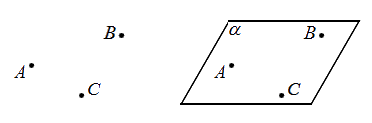

In [3]:
Image('плоскость.png')

Однако никто нам не гарантирует, что матрица $X$ будет удовлетворять нужным свойствам.

## MSE

Без ограничений общности можем считать, что в $X$ **отсутствуют** линейно-зависимые строки\столбцы (будем считать что их заранее убрали).

Необязательная сноска:
 * Более того, в практическом смысле у нас действительно не может быть линейно-зависимых строк, потому что объекты у нас берутся из некоторого пространства $\mathbb{X}$. Если оно непрерывно (хотя бы один признак - непрерывен), то вероятность попасть в одну точку пространства равна 0. 

* К тому же, к реально наблюдаемым данных добавляется нормальный шум, который представляет собой независимую случайную величину - значит все объекты независимы.

Пусть $n > m$. Тогда мы не можем провести через $n$ точек в пространстве размерности $m$ гиперплоскость. Соответственно решений системы $Xw = Y$ - нет.

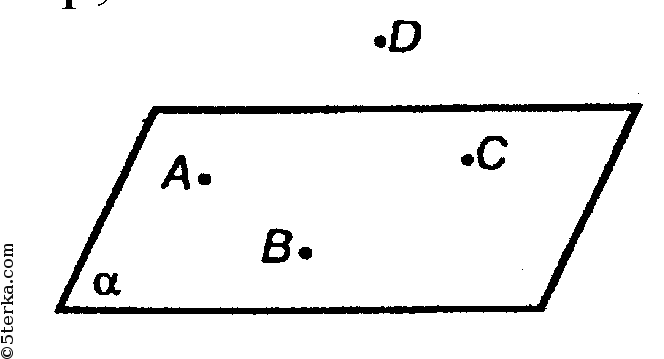

In [6]:
Image('плоскость2.png', width=500)

В этом случае давайте проводить плоскость такую, что расстояния от точек до этой плоскости будет минимальным.

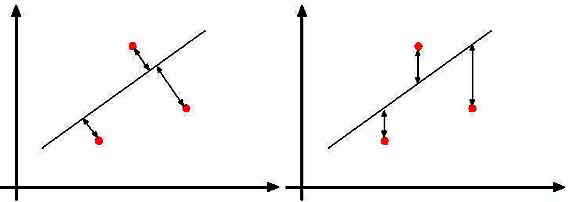

In [8]:
Image('расстояние.jpg')

Тут у нас есть вариант взять метрику эвклидову (квадраты расстояний $MSE$) или манхетонову (модуль расстояний $MAE$). Берем $MSE$, потому что ее можно легко дифференцировать (да, это действительно единственное объяснение)

У тут мы можем вспомнить, что мы уже видели раньше: функционал ошибки
$$Q(a(x), y) = MSE = \frac{1}{n}\sum_{i=1}^{n} (a(x^i)-y^i)^2 \rightarrow min$$

Который можно записать в более аккуратном матричном виде:
$$L(w) = \lVert Xw - Y\rVert_2^2 \rightarrow min$$

$\lVert x \rVert_2^2 = \sum_{i=1}^{n}x_1^2 + \ldots + x_n^2$ -квадрат нормы эвклидовой метрики

Теперь чтобы найти $w$ - применим единственное возможно действие, когда мы видим минимизацию линейной функции - возьмем производную по аргументу вектору или (тоже самое) возьмем частные производные каждого $w_i$

$$\nabla_{w}L = \begin{cases}
\frac{\partial L}{\partial w_1} = \frac{1}{n}\sum_{i=1}^{n} 2x_1^{i}(a(x^i)-y^i)\\
\ldots \\
\frac{\partial L}{\partial w_j} = \frac{1}{n}\sum_{i=1}^{n} 2x_j^{i}(a(x^i)-y^i)\\
\ldots \\
\frac{\partial L}{\partial w_j} = \frac{1}{n}\sum_{i=1}^{n} 2x_m^{i}(a(x^i)-y^i)
\end{cases}$$

$\nabla_{w}L$ - называется **градиентом** линейной функции $L$, по парамеру вектору $w$ 

Если на эту систему внимательно посмотреть (или изучить матричное дифференцирование), можно понять, что данная систему можно записать тоже в матричном виде:

$$ \nabla_{w}L = 2X^{T}(Xw - Y)$$

Осталось совершить последнее стандартное действие - приравнять производную к нулю вектору и решить матричное уравнение.

$$ 0 = 2X^{T}(Xw - Y)$$

$$ X^{T}Xw = X^{T}Y$$

$$ w = (X^{T}X)^{-1}X^{T}Y$$

Теперь давайте подумаем, избавилось ли данное решение от предыдущих проблем:
* Матрица $X^{T}X$ - действительно квадратная размера $m\times m$
* Если $rang(X) = max\{m,n\} = m$, то матрица $X^{T}X$ - имеет ранг $m$ (докажите сами или спросите препода по линалу)

Следовательно - обратная матрица $(X^{T}X)^{-1}$ - существует. А значит получили новое решение, для функционала $MSE$.

## А что если объектов мало?

В редком случае у нас может случиться так, что $m > n$ (признаков больше чем объектов). Значит у системы $Xw = Y$ имеется бесконечно много решений.

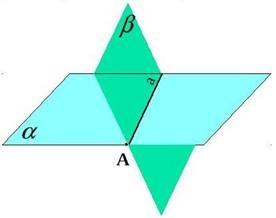

In [9]:
Image('плоскости.jpg')

Если же будем применять $MSE$, то получим, что матрица $X$ имеет ранг $n$, а значит матрица $X^{T}X$ - также имеет ранг $n$ (а не $m$, потому что $m < n$). В этом случае у нас опять не будет существовать решения.

В этом случае воcпользуемся еще одной эвристикой - давайте найдем среди всех плоскостей плоскость с наименьшей нормой.
$$$$